import pandas as pd
import numpy

df = pd.read_csv("websitedata.csv")

In [5]:
print(df)

    Numof Clicks  Mins spent  Frequency   Device  Timestamp Location  \
0              1          20          3    Phone   00.00.12   Berlin   
1              2          35          2    Phone   00.01.00   Berlin   
2              3          15          3    Phone   00.03.00   Berlin   
3              1          10          3    Phone   00.40.00   Berlin   
4              2          25          1    Phone   00.23.01   munich   
5              2          12          4  laptops   00.02.22   munich   
6              2          15          3  laptops  00.10.11    munich   
7              2          16          6  laptops   00.10.12   munich   
8              2           5          9  laptops   00.10.13   munich   
9              2           8          3   tablet   00.10.14    Lagos   
10             2          18          4   tablet   00.10.15    Lagos   

      Catergory  
0   sport based  
1   sport based  
2   sport based  
3   sport based  
4   sport based  
5      Artistic  
6      Ar

In [6]:
print(df.isnull().sum())

Numof Clicks    0
Mins spent      0
Frequency       0
Device          0
Timestamp       0
Location        0
Catergory       0
dtype: int64


In [9]:
import matplotlib.pyplot as plt


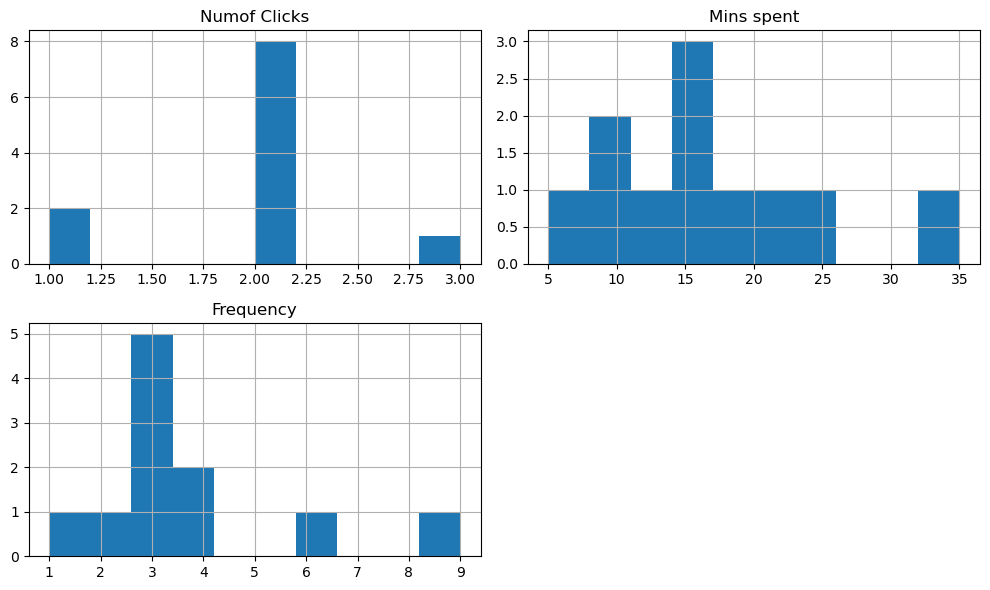

In [10]:
# Visualizing the distribution of numerical variables
df[['Numof Clicks', 'Mins spent', 'Frequency']].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

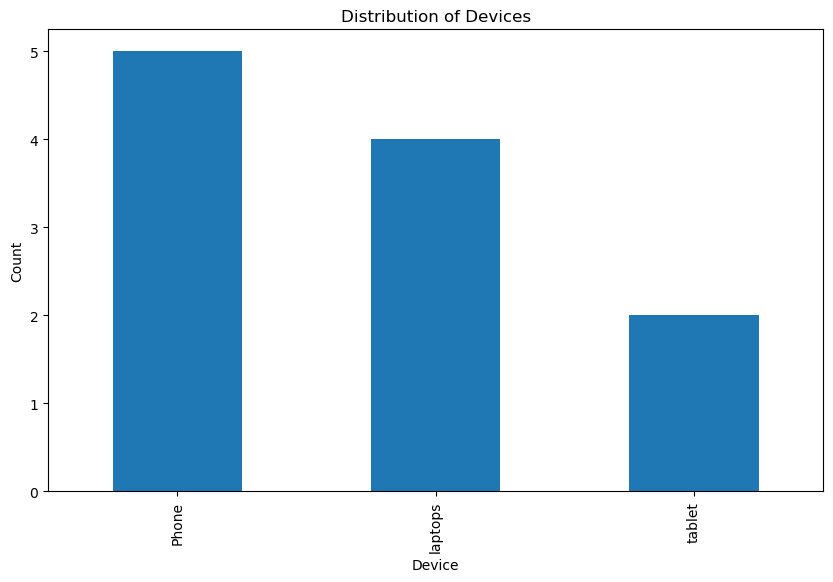

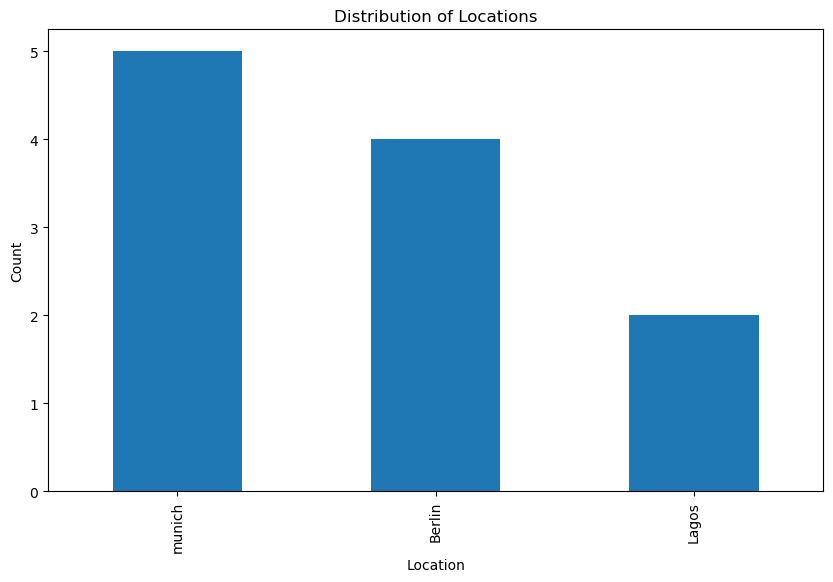

In [12]:
# Visualizing the distribution of categorical variables
plt.figure(figsize=(10, 6))
df['Device'].value_counts().plot(kind='bar')
plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Distribution of Devices')
plt.show()

plt.figure(figsize=(10, 6))
df['Location'].value_counts().plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Locations')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report



In [26]:
# Encoding categorical variables
le = LabelEncoder()
df['Device'] = le.fit_transform(df['Device'])
df['Location'] = le.fit_transform(df['Location'])
df['Catergory'] = le.fit_transform(df['Catergory'])
df['Timestamp'] = le.fit_transform(df['Timestamp'])


In [27]:
# Splitting the data into features (X) and target (y)
X = df.drop(['Catergory'], axis=1)
y = df['Catergory']


In [28]:
print(X)
print(y)

    Numof Clicks  Mins spent  Frequency  Device  Timestamp  Location
0              1          20          3       0          0         0
1              2          35          2       0          1         0
2              3          15          3       0          3         0
3              1          10          3       0         10         0
4              2          25          1       0          9         2
5              2          12          4       1          2         2
6              2          15          3       1          4         2
7              2          16          6       1          5         2
8              2           5          9       1          6         2
9              2           8          3       2          7         1
10             2          18          4       2          8         1
0     2
1     2
2     2
3     2
4     2
5     0
6     0
7     0
8     1
9     1
10    1
Name: Catergory, dtype: int64


In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
 #Creating and training the decision tree classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree = dtree.fit(X_train, y_train)

In [33]:
 #Predicting on the test set
y_pred = dtree.predict(X_test)



In [34]:
print(y_pred)

[0 2 1]


In [35]:
# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [37]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  


In [38]:
print(cm)

[[1 0 0]
 [0 1 0]
 [0 0 1]]
